# Embedding matrix implementation using Keras

Project title: Automating literature reviews using recommender systems


Authors : Alarmelu PM, Akhila Bolisetty, Andrew Szeto

The following code implementation is based on the tutorial in Keras

Reference: https://keras.io/examples/structured_data/collaborative_filtering_movielens/

and our learning and understanding on the area of recommender systems
        

Keras is a deep learning API which runs on top of TensorFlow. It is extremely useful
for implementing Deep learning algorithms in python

In [5]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df_in = pd.read_csv('sciencepapers_with_userprofiles.csv')

In [7]:
df_in.rating = df_in.rating.fillna(3).astype(int)
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              2294 non-null   int64 
 1   Area of interest  2294 non-null   object
 2   Input             2294 non-null   object
 3   title             2294 non-null   object
 4   rating            2294 non-null   int64 
 5   arxiv_id          2294 non-null   object
 6   paperId           2294 non-null   object
 7   created           2294 non-null   object
 8   categories        2292 non-null   object
 9   authors           2294 non-null   object
 10  keywords          2294 non-null   object
dtypes: int64(2), object(9)
memory usage: 197.3+ KB


In [14]:
#Doing a little bit of exploratory analysis

In [16]:
#df_in.columns
#taking only the columns of interest
rating_cols = ['user','paperId','rating'] 
rating = df_in[rating_cols]
rating

,user,paperId,rating
0,1,7051457,5
1,1,10050214,1
2,1,7051453,3
3,1,7043501,2
4,1,8092686,3
...,...,...,...
2289,222,12023461,3
2290,222,10074602,3
2291,222,180609339,2
2292,222,1610065,2


In [15]:
df_in.nunique() #unique values in each column

user                222
Area of interest     51
Input                76
title               599
rating                5
arxiv_id            596
paperId             592
created             525
categories          133
authors             565
keywords            598
dtype: int64

In [17]:
#no of unique users
df_in.user.nunique()

222

In [18]:
#no of unique titles
df_in.title.nunique()

599

In [19]:
#checking the 6 rating in the dataset and it needs to be removed
df_in.rating.value_counts()

3    752
4    510
2    480
5    330
1    222
Name: rating, dtype: int64

In [20]:
#remove the rating 6 and fill it with median rating
df_in.loc[df_in.rating > 5, 'rating'] = np.nan
df_in.rating = df_in.rating.fillna(3).astype(int)
df_in.rating.value_counts()

3    752
4    510
2    480
5    330
1    222
Name: rating, dtype: int64

# Data preprocessing and encoding to pass into Embedding matrix algorithm

Since we are using Keras for building the embedding matrix, the data feed has to be made compatible with the algorithm.

In this compatible format, each word needs to be represented by an unique integer.

The embedding layer of the keras models are initialized with random weights along with the word embeddings in the training dataset.



In [23]:
#encode the users
user_ids = df_in["user"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
print(user2user_encoded)

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 114, 116: 115, 117: 116, 118: 117, 119: 118, 120: 119, 121: 120, 122: 12

In [24]:
userencoded2user = {i: x for i, x in enumerate(user_ids)}
print(userencoded2user)

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60, 60: 61, 61: 62, 62: 63, 63: 64, 64: 65, 65: 66, 66: 67, 67: 68, 68: 69, 69: 70, 70: 71, 71: 72, 72: 73, 73: 74, 74: 75, 75: 76, 76: 77, 77: 78, 78: 79, 79: 80, 80: 81, 81: 82, 82: 83, 83: 84, 84: 85, 85: 86, 86: 87, 87: 88, 88: 89, 89: 90, 90: 91, 91: 92, 92: 93, 93: 94, 94: 95, 95: 96, 96: 97, 97: 98, 98: 99, 99: 100, 100: 101, 101: 102, 102: 103, 103: 104, 104: 105, 105: 106, 106: 107, 107: 108, 108: 109, 109: 110, 110: 111, 111: 112, 112: 113, 113: 114, 114: 115, 115: 116, 116: 117, 117: 118, 118: 119, 119: 120, 120: 121, 121: 12

In [25]:
paper_ids = df_in["paperId"].unique().tolist()
paper2paper_encoded = {x: i for i, x in enumerate(paper_ids)}
print(paper2paper_encoded)

{'7051457': 0, '10050214': 1, '7051453': 2, '7043501': 3, '8092686': 4, '14112855': 5, '170108029': 6, '9041299': 7, '8110741': 8, '170108028': 9, '7071304': 10, '150205106': 11, '703113': 12, '8091965': 13, '7071306': 14, '7071548': 15, '10062077': 16, '11060304': 17, '13012236': 18, '11020372': 19, '160600295': 20, '151003302': 21, '8041409': 22, '180301248': 23, '12112126': 24, '9043319': 25, '13044963': 26, '180601168': 27, '8091963': 28, '181006021': 29, '13075437': 30, '13054054': 31, '180904284': 32, '14015465': 33, '170907493': 34, '18110166': 35, '160600996': 36, '160605787': 37, '12084175': 38, '181009378': 39, '14080517': 40, '180105161': 41, '181011832': 42, '1404216': 43, '1010244': 44, '170702047': 45, '12032574': 46, '12084166': 47, '160605781': 48, '170701869': 49, '171202882': 50, '14017733': 51, '12081932': 52, '171210266': 53, '12052555': 54, '12075226': 55, '170200093': 56, '17120332': 57, '14016628': 58, '1312214': 59, '18051232': 60, '171107295': 61, '180803555': 

In [26]:
paper_encoded2paper = {i: x for i, x in enumerate(paper_ids)}
print(paper_encoded2paper)

{0: '7051457', 1: '10050214', 2: '7051453', 3: '7043501', 4: '8092686', 5: '14112855', 6: '170108029', 7: '9041299', 8: '8110741', 9: '170108028', 10: '7071304', 11: '150205106', 12: '703113', 13: '8091965', 14: '7071306', 15: '7071548', 16: '10062077', 17: '11060304', 18: '13012236', 19: '11020372', 20: '160600295', 21: '151003302', 22: '8041409', 23: '180301248', 24: '12112126', 25: '9043319', 26: '13044963', 27: '180601168', 28: '8091963', 29: '181006021', 30: '13075437', 31: '13054054', 32: '180904284', 33: '14015465', 34: '170907493', 35: '18110166', 36: '160600996', 37: '160605787', 38: '12084175', 39: '181009378', 40: '14080517', 41: '180105161', 42: '181011832', 43: '1404216', 44: '1010244', 45: '170702047', 46: '12032574', 47: '12084166', 48: '160605781', 49: '170701869', 50: '171202882', 51: '14017733', 52: '12081932', 53: '171210266', 54: '12052555', 55: '12075226', 56: '170200093', 57: '17120332', 58: '14016628', 59: '1312214', 60: '18051232', 61: '171107295', 62: '18080355

In [27]:
df_in["user"] = df_in["user"].map(user2user_encoded)
df_in["paperId"] = df_in["paperId"].map(paper2paper_encoded)

In [28]:
df_in

,user,Area of interest,Input,title,rating,arxiv_id,paperId,created,categories,authors,keywords
0,0,Warehousing Web Data,Warehousing Web Data,Web data modeling for integration in data ware...,5,705.1457,0,5/10/07,cs_DB,"Sami Miniaoui, J√©r√¥me Darmont, Omar Boussa√Ød","uml conceptual model, complex object represent..."
1,0,Warehousing Web Data,Warehousing Web Data,First-order Complete and Computationally Compl...,1,1005.0214,1,5/10/07,cs_DB,"Floris Geerts, Sofie Haesevoets, Bart Kuijpers","spatio-temporal databases, define spatio-tempo..."
2,0,Warehousing Web Data,Warehousing Web Data,DWEB: A Data Warehouse Engineering Benchmark,3,705.1453,2,5/10/07,cs_DB,"J√©r√¥me Darmont, Fadila Bentayeb, Omar Bous...","decision support query performance, data wareh..."
3,0,Warehousing Web Data,Warehousing Web Data,Warehousing Web Data,2,704.3501,3,4/26/07,cs_DB,"J√©r√¥me Darmont, Omar Boussa√Ød, Fadila Ben...","multiform input data, so-called multiform, fir..."
4,0,Warehousing Web Data,Warehousing Web Data,An MAS-Based ETL Approach for Complex Data,3,809.2686,4,9/16/08,cs_DB,"Omar Boussa√Ød, Fadila Bentayeb, J√©r√¥me Da...","complex data integration, data integration pro..."
...,...,...,...,...,...,...,...,...,...,...,...
2289,221,Data Mining,Scientific Data Mining in Astronomy,Adaptively Sharing Time-Series with Differenti...,3,1202.3461,259,2/15/12,cs_DB,"Liyue Fan, Li Xiong","releasing time-series data, release real-time ..."
2290,221,Data Mining,Scientific Data Mining in Astronomy,The Use of Scientific Data: A Content Analysis,3,1007.4602,166,7/26/10,"astro-ph_IM,cs_DL","Jian Zhang, Chaomei Chen, Michael S. Vogeley","data usage patterns, called data-intensive sci..."
2291,221,Data Mining,Scientific Data Mining in Astronomy,SAQL: A Stream-based Query System for Real-Tim...,2,1806.09339,260,6/25/18,"cs_CR,cs_DB","Peng Gao, Xusheng Xiao, Ding Li","perform timely anomaly detection, large-scale ..."
2292,221,Data Mining,Scientific Data Mining in Astronomy,Continuous Top-k Queries over Real-Time Web St...,2,1610.065,261,10/20/16,cs_DB,"Nelly Vouzoukidou, Bernd Amann, Vassilis Chr...","real-time web applications, efficiently implem..."


In [29]:
num_users = len(user2user_encoded)
num_papers = len(paper_encoded2paper)
df_in["rating"] = df_in["rating"].values.astype(np.float32)

In [30]:
df_in

,user,Area of interest,Input,title,rating,arxiv_id,paperId,created,categories,authors,keywords
0,0,Warehousing Web Data,Warehousing Web Data,Web data modeling for integration in data ware...,5.0,705.1457,0,5/10/07,cs_DB,"Sami Miniaoui, J√©r√¥me Darmont, Omar Boussa√Ød","uml conceptual model, complex object represent..."
1,0,Warehousing Web Data,Warehousing Web Data,First-order Complete and Computationally Compl...,1.0,1005.0214,1,5/10/07,cs_DB,"Floris Geerts, Sofie Haesevoets, Bart Kuijpers","spatio-temporal databases, define spatio-tempo..."
2,0,Warehousing Web Data,Warehousing Web Data,DWEB: A Data Warehouse Engineering Benchmark,3.0,705.1453,2,5/10/07,cs_DB,"J√©r√¥me Darmont, Fadila Bentayeb, Omar Bous...","decision support query performance, data wareh..."
3,0,Warehousing Web Data,Warehousing Web Data,Warehousing Web Data,2.0,704.3501,3,4/26/07,cs_DB,"J√©r√¥me Darmont, Omar Boussa√Ød, Fadila Ben...","multiform input data, so-called multiform, fir..."
4,0,Warehousing Web Data,Warehousing Web Data,An MAS-Based ETL Approach for Complex Data,3.0,809.2686,4,9/16/08,cs_DB,"Omar Boussa√Ød, Fadila Bentayeb, J√©r√¥me Da...","complex data integration, data integration pro..."
...,...,...,...,...,...,...,...,...,...,...,...
2289,221,Data Mining,Scientific Data Mining in Astronomy,Adaptively Sharing Time-Series with Differenti...,3.0,1202.3461,259,2/15/12,cs_DB,"Liyue Fan, Li Xiong","releasing time-series data, release real-time ..."
2290,221,Data Mining,Scientific Data Mining in Astronomy,The Use of Scientific Data: A Content Analysis,3.0,1007.4602,166,7/26/10,"astro-ph_IM,cs_DL","Jian Zhang, Chaomei Chen, Michael S. Vogeley","data usage patterns, called data-intensive sci..."
2291,221,Data Mining,Scientific Data Mining in Astronomy,SAQL: A Stream-based Query System for Real-Tim...,2.0,1806.09339,260,6/25/18,"cs_CR,cs_DB","Peng Gao, Xusheng Xiao, Ding Li","perform timely anomaly detection, large-scale ..."
2292,221,Data Mining,Scientific Data Mining in Astronomy,Continuous Top-k Queries over Real-Time Web St...,2.0,1610.065,261,10/20/16,cs_DB,"Nelly Vouzoukidou, Bernd Amann, Vassilis Chr...","real-time web applications, efficiently implem..."


In [32]:
#find the min and max ratings 
min_rating = min(df_in["rating"])
max_rating = max(df_in["rating"])

#this will be useful for normalizing the dataset

In [34]:
print('no of users',num_users)
print('no of papers',num_papers)
print('min rating',min_rating)
print('max rating',max_rating)

no of users 222
no of papers 592
min rating 1.0
max rating 5.0


# Training and test datasets


In [35]:
# keep the random state at a specified number so that the results remain consistent
df_in= df_in.sample(frac=1, random_state=42)                                                 

In [36]:
#inputs to the model will be
x = df_in[["user", "paperId"]].values

#target to be predicted
y = df_in["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

In [37]:
#80% of the data will be used for training the model 
train_indices = int(0.8 * df_in.shape[0])

In [38]:
x_train, x_val, y_train, y_val = (x[:train_indices],x[train_indices:],y[:train_indices],y[train_indices:],)

In [41]:
#embedding size for our data is kept at 25 which means we will embedd the papers and users in 25-dimensional vectors
embedding_size = 25

Building the deep learning recommender


We have 2 embedded layer for this model, one is for the user and the other is for the
papers.The dot product between tge user and papers embedding layers to find the user-paper
preference patters and then in the end run a sigmoid function to get the output

In [43]:
class deepL_recommender(keras.Model):
    def __init__(self, num_users, num_papers, embedding_size, **kwargs):
        super(deepL_recommender, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_papers = num_papers
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.user_bias = layers.Embedding(num_users, 1)
        self.paper_embedding = layers.Embedding(
            num_papers,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=keras.regularizers.l2(1e-6),
        )
        self.paper_bias = layers.Embedding(num_papers, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        paper_vector = self.paper_embedding(inputs[:, 1])
        paper_bias = self.paper_bias(inputs[:, 1])
        dot_user_paper = tf.tensordot(user_vector, paper_vector, 2)
        # Add all the components (including bias)
        x = dot_user_paper + user_bias + paper_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return tf.nn.sigmoid(x)

In [54]:
#model object and parameters

embedd_model = deepL_recommender(num_users, num_papers, embedding_size)
embedd_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.001))

In [55]:
#train the model - 30 epochs
history = embedd_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=30,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/30
29/29 [==============================] - 1s 6ms/step - loss: 0.7001 - val_loss: 0.6910
Epoch 2/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6946 - val_loss: 0.6884
Epoch 3/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6897 - val_loss: 0.6861
Epoch 4/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6909 - val_loss: 0.6844
Epoch 5/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6850 - val_loss: 0.6825
Epoch 6/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6790 - val_loss: 0.6805
Epoch 7/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6774 - val_loss: 0.6787
Epoch 8/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6753 - val_loss: 0.6770
Epoch 9/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6730 - val_loss: 0.6749
Epoch 10/30
29/29 [==============================] - 0s 2ms/step - loss: 0.6709 - val_loss: 0.6740
Epoch 11/30
29/29 [

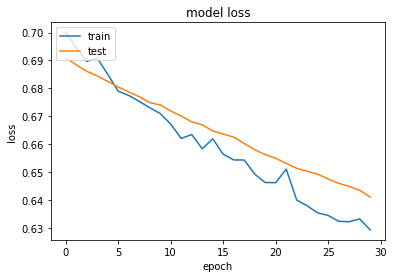

In [56]:
#plot training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [58]:
#train the model - 100 epochs
history = embedd_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5852 - val_loss: 0.6054
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5849 - val_loss: 0.6049
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5851 - val_loss: 0.6044
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5832 - val_loss: 0.6035
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5831 - val_loss: 0.6025
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5812 - val_loss: 0.6018
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5794 - val_loss: 0.6013
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5799 - val_loss: 0.6005
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5781 - val_loss: 0.5997
Epoch 10/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5775 - val_loss: 0.5988
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.5378 - val_loss: 0.5690
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5378 - val_loss: 0.5689
Epoch 85/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5371 - val_loss: 0.5687
Epoch 86/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5361 - val_loss: 0.5683
Epoch 87/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5365 - val_loss: 0.5680
Epoch 88/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5351 - val_loss: 0.5678
Epoch 89/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5357 - val_loss: 0.5673
Epoch 90/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5357 - val_loss: 0.5670
Epoch 91/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5353 - val_loss: 0.5669
Epoch 92/100
29/29 [==============================] - 0s 2ms/step - loss: 0.5353 - val_loss: 0.5664
Epoch 93/100


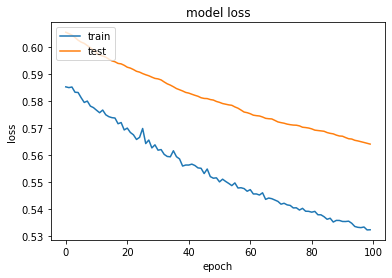

In [59]:
#plot training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [60]:
#train the model - 200 epochs
history = embedd_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=200,
    verbose=1,
    validation_data=(x_val, y_val),
)

Epoch 1/200
29/29 [==============================] - 0s 3ms/step - loss: 0.5324 - val_loss: 0.5637
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5346 - val_loss: 0.5633
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5327 - val_loss: 0.5630
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5318 - val_loss: 0.5627
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5314 - val_loss: 0.5624
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5311 - val_loss: 0.5623
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5308 - val_loss: 0.5621
Epoch 8/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5302 - val_loss: 0.5619
Epoch 9/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5311 - val_loss: 0.5614
Epoch 10/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5298 - val_loss: 0.5612
Epoch 11/

29/29 [==============================] - 0s 2ms/step - loss: 0.5160 - val_loss: 0.5512
Epoch 84/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5154 - val_loss: 0.5510
Epoch 85/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5156 - val_loss: 0.5511
Epoch 86/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5160 - val_loss: 0.5509
Epoch 87/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5152 - val_loss: 0.5510
Epoch 88/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5155 - val_loss: 0.5509
Epoch 89/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5156 - val_loss: 0.5511
Epoch 90/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5153 - val_loss: 0.5510
Epoch 91/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5151 - val_loss: 0.5507
Epoch 92/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5145 - val_loss: 0.5508
Epoch 93/200


29/29 [==============================] - 0s 2ms/step - loss: 0.5075 - val_loss: 0.5452
Epoch 165/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5073 - val_loss: 0.5451
Epoch 166/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5075 - val_loss: 0.5449
Epoch 167/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5073 - val_loss: 0.5449
Epoch 168/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5072 - val_loss: 0.5450
Epoch 169/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5069 - val_loss: 0.5451
Epoch 170/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5074 - val_loss: 0.5451
Epoch 171/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5071 - val_loss: 0.5451
Epoch 172/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5072 - val_loss: 0.5452
Epoch 173/200
29/29 [==============================] - 0s 2ms/step - loss: 0.5069 - val_loss: 0.5451
Epoc

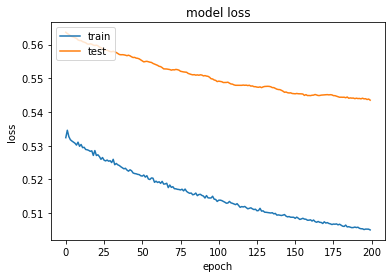

In [61]:
#plot training and validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

We can see that as the epochs increase, the training and validation errors come down. the model is also not overfitting
as we can see that the test loss is significantly different than the training loss.